In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"

# Названия колонок
columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
           'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
           'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
           'Horizontal_Distance_To_Fire_Points'] + ['Wilderness_Area_{}'.format(i) for i in range(1, 5)] + \
          ['Soil_Type_{}'.format(i) for i in range(1, 41)] + ['Cover_Type']

# Загрузка датасета в Pandas DataFrame
df = pd.read_csv(url, header=None, names=columns)
df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type_32  Soil_Type_33  \
0                                6279  ...             0             0   
1                                6225  ...             0             0   
2                                6121  ...             0             0   
3                                6211  ...             0             0   
4                                6172  ...             0             0   

   Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  Soil_Type_38  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Soil_Type_39  Soil_Type_40  Cover_Type  
0             0             0           5  
1             0             0           5  
2             0             0           2  
3             0             0           2  
4             0             0           5  

[5 rows x 55 columns]

In [5]:
columns_best = ['Elevation', 'Wilderness_Area_4', 'Soil_Type_4', 'Wilderness_Area_1', 'Soil_Type_2', 'Aspect', 'Slope',
                'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Cover_Type']

df = df[columns_best]

In [6]:
df.loc[(df['Cover_Type'] == 1) | (df['Cover_Type'] == 2) | (df['Cover_Type'] == 4) | (df['Cover_Type'] == 5) | (df['Cover_Type'] == 6) | (df['Cover_Type'] == 7), 'Cover_Type'] = 1
df.loc[df['Cover_Type'] == 3, 'Cover_Type'] = 0
df['Cover_Type'].value_counts()

1    545258
0     35754
Name: Cover_Type, dtype: int64

In [7]:
df.describe()

Elevation  Wilderness_Area_4    Soil_Type_4  Wilderness_Area_1  \
count  581012.000000      581012.000000  581012.000000      581012.000000   
mean     2959.365301           0.063627       0.021335           0.448865   
std       279.984734           0.244087       0.144499           0.497379   
min      1859.000000           0.000000       0.000000           0.000000   
25%      2809.000000           0.000000       0.000000           0.000000   
50%      2996.000000           0.000000       0.000000           0.000000   
75%      3163.000000           0.000000       0.000000           1.000000   
max      3858.000000           1.000000       1.000000           1.000000   

         Soil_Type_2         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean        0.012952     155.656807      14.103704   
std         0.113066     111.913721       7.488242   
min         0.000000       0.000000       0.000000   
25%         0.000000      58.000000       9.000000   
50%         0.000000     127.000000      13.000000   
75%         0.000000     260.000000      18.000000   
max         1.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points     Cover_Type  
count  581012.000000                       581012.000000  581012.000000  
mean      142.528263                         1980.291226       0.938463  
std        38.274529                         1324.195210       0.240314  
min         0.000000                            0.000000       0.000000  
25%       119.000000                         1024.000000       1.000000  
50%       143.000000                         1710.000000       1.000000  
75%       168.000000                         2550.000000       1.000000  
max       254.000000                         7173.000000       1.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 15 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Wilderness_Area_4                   581012 non-null  int64
 2   Soil_Type_4                         581012 non-null  int64
 3   Wilderness_Area_1                   581012 non-null  int64
 4   Soil_Type_2                         581012 non-null  int64
 5   Aspect                              581012 non-null  int64
 6   Slope                               581012 non-null  int64
 7   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 8   Vertical_Distance_To_Hydrology      581012 non-null  int64
 9   Horizontal_Distance_To_Roadways     581012 non-null  int64
 10  Hillshade_9am                       581012 non-null  int64
 11  Hillshade_Noon                      581012 non-null 

In [9]:
df['Cover_Type'].unique()

array([1, 0])

In [10]:
df['Cover_Type'].value_counts()

1    545258
0     35754
Name: Cover_Type, dtype: int64

In [11]:
class_names = {1:'Others',0:'Ponderosa_Pine'}
df['Cover_Name'] = df['Cover_Type'].map(class_names)

In [12]:
from sklearn.utils import resample
df_smaller = resample(df, n_samples=10000)
df_smaller['Cover_Type'].value_counts()
df = df_smaller

In [13]:
df.head(3)

Elevation  Wilderness_Area_4  Soil_Type_4  Wilderness_Area_1  \
288846       2435                  1            0                  0   
262397       2800                  0            0                  1   
233446       2681                  0            0                  0   

        Soil_Type_2  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
288846            0      14     22                               335   
262397            0     314     22                                90   
233446            0      71     32                               201   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
288846                             165                              830   
262397                             -22                               90   
233446                             125                             1584   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
288846            193             189            126   
262397            158             217            198   
233446            236             162             33   

        Horizontal_Distance_To_Fire_Points  Cover_Type Cover_Name  
288846                                 800           1     Others  
262397                                1263           1     Others  
233446                                1298           1     Others

In [14]:
#df_2_classes = df[(df['ClassID']!=2)]
#df_3_classes = df
df_2_classes = df

In [15]:
df_2_classes['Cover_Type'].value_counts()

1    9395
0     605
Name: Cover_Type, dtype: int64

In [16]:
#df_3_classes['ClassName'].value_counts()

In [17]:
X = df_2_classes.drop(['Cover_Type', 'Cover_Name'],axis=1)
y = df_2_classes['Cover_Name']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=None, max_features= 7, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_features=7, n_estimators=200)

In [20]:
y_pred_tree = rf_model.predict(X_test)

In [21]:
print(y_pred_tree)
print(y_test.tolist())

['Others' 'Others' 'Others' ... 'Others' 'Others' 'Others']
['Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Ponderosa_Pine', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Ponderosa_Pine', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Ponderosa_Pine', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Ponderosa_Pine', 'Others', 'Others', 'Ponderosa_Pine', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Others', 'Ponderosa_Pine', 'Others', 'Others', 'Ponderosa_Pine', 'Ot

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=y_pred_tree))

                precision    recall  f1-score   support

        Others       0.98      0.99      0.99      2820
Ponderosa_Pine       0.83      0.72      0.77       180

      accuracy                           0.97      3000
     macro avg       0.91      0.86      0.88      3000
  weighted avg       0.97      0.97      0.97      3000



In [111]:
from sklearn.inspection import permutation_importance
scoring = ['r2', 'neg_mean_absolute_percentage_error','neg_mean_squared_error']
r_multi_pi = permutation_importance(rf_model, X, y, n_repeats=30, random_state=1, scoring = scoring)

for metric in r_multi_pi:
  print(f'Metric: {metric}')
  r_pi = r_multi_pi[metric]
  for i in r_pi.importances_mean.argsort()[::-1]:
    if r_pi.importances_mean[i]-2*r_pi.importances_std[i]>0:
      print(f'{X.columns[i]:<8}',f'{r_pi.importances_mean[i]:.3f}',f' +/- {r_pi.importances_std[i]:3f}')
  print('')

Metric: r2
Elevation 1.121  +/- 0.027898
Soil_Type_2 0.121  +/- 0.008987
Horizontal_Distance_To_Hydrology 0.106  +/- 0.009729
Soil_Type_4 0.093  +/- 0.005207
Horizontal_Distance_To_Fire_Points 0.086  +/- 0.010065
Horizontal_Distance_To_Roadways 0.083  +/- 0.008393
Vertical_Distance_To_Hydrology 0.065  +/- 0.006859
Wilderness_Area_1 0.061  +/- 0.007583
Hillshade_Noon 0.047  +/- 0.009612
Wilderness_Area_4 0.046  +/- 0.004122
Hillshade_9am 0.038  +/- 0.004395
Aspect   0.036  +/- 0.004970
Slope    0.025  +/- 0.007381

Metric: neg_mean_absolute_percentage_error
Elevation 197122555690006.594  +/- 3023678913014.085449
Soil_Type_4 22022602177841.715  +/- 738645258793.576172
Wilderness_Area_1 16738378615060.342  +/- 1896806290473.832520
Horizontal_Distance_To_Roadways 15222166740512.279  +/- 1678661006358.144531
Horizontal_Distance_To_Fire_Points 9727775195120.271  +/- 1707412762153.564697
Soil_Type_2 8902115263435.686  +/- 300615040857.244812
Hillshade_Noon 8827055269646.174  +/- 1695492117692

In [112]:
perm_importances = permutation_importance(rf_model, X, y, n_repeats=30, random_state=1)

for i in perm_importances.importances_mean.argsort()[::-1]:
  if perm_importances.importances_mean[i]-2*perm_importances.importances_std[i]>0:
    print(f'{X.columns[i]:<8}',f'{perm_importances.importances_mean[i]:.3f}',f' +/- {perm_importances.importances_std[i]:3f}')

Elevation 0.064  +/- 0.001586
Soil_Type_2 0.007  +/- 0.000511
Horizontal_Distance_To_Hydrology 0.006  +/- 0.000553
Soil_Type_4 0.005  +/- 0.000296
Horizontal_Distance_To_Fire_Points 0.005  +/- 0.000572
Horizontal_Distance_To_Roadways 0.005  +/- 0.000477
Vertical_Distance_To_Hydrology 0.004  +/- 0.000390
Wilderness_Area_1 0.003  +/- 0.000431
Hillshade_Noon 0.003  +/- 0.000546
Wilderness_Area_4 0.003  +/- 0.000234
Hillshade_9am 0.002  +/- 0.000250
Aspect   0.002  +/- 0.000282
Slope    0.001  +/- 0.000420


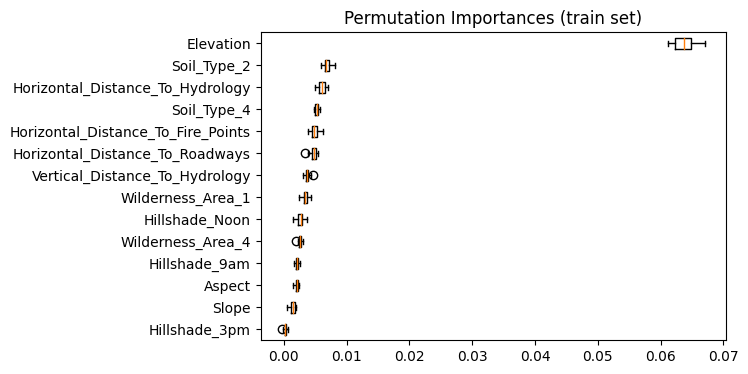

In [113]:
fig, ax = plt.subplots(figsize=(6,4))
sorted_idx = perm_importances.importances_mean.argsort()
ax.boxplot(perm_importances.importances[sorted_idx].T, vert=False, labels=X_train.columns[sorted_idx])
ax.set_title('Permutation Importances (train set)')
plt.show()

In [23]:
%%bash
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 11.6 MB/s eta 0:00:00


In [24]:
import shap
rf_explainer = shap.TreeExplainer(rf_model)
rf_shap_values = rf_explainer.shap_values(X_test)

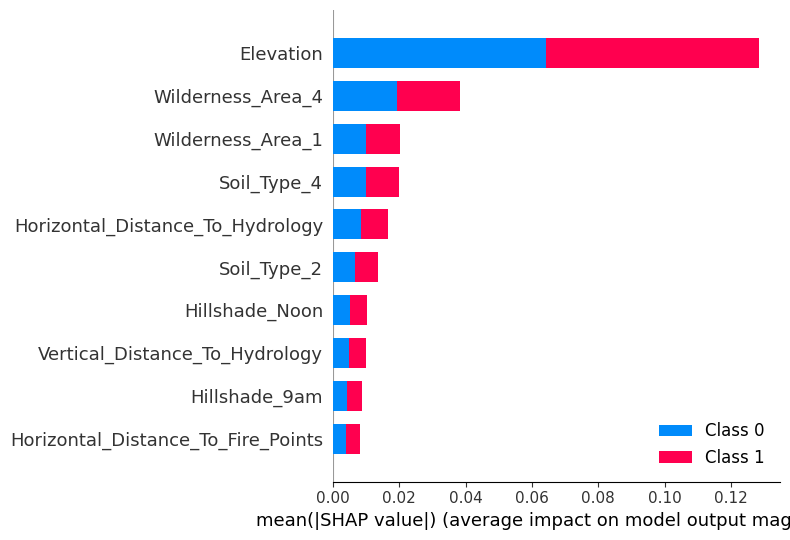

In [25]:
shap.summary_plot(rf_shap_values, X_test, plot_type = 'bar', max_display = 10)

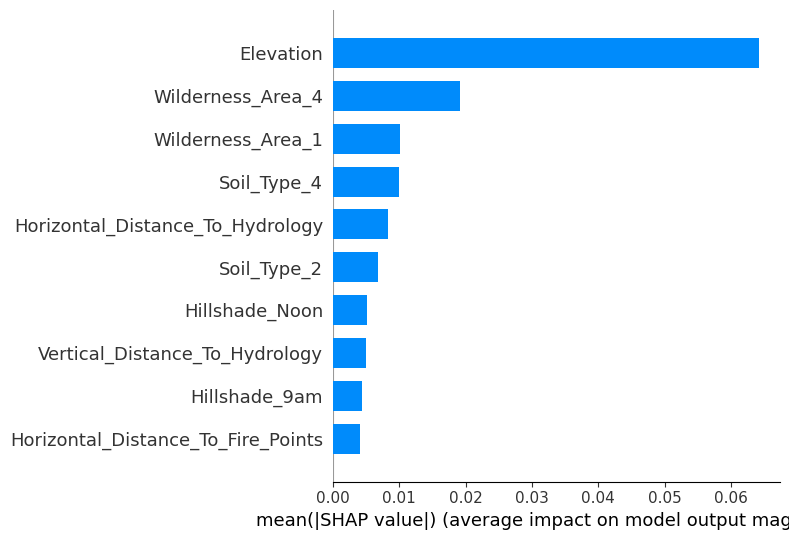

In [26]:
shap.summary_plot(rf_shap_values[0], X_test, plot_type = 'bar', max_display = 10)

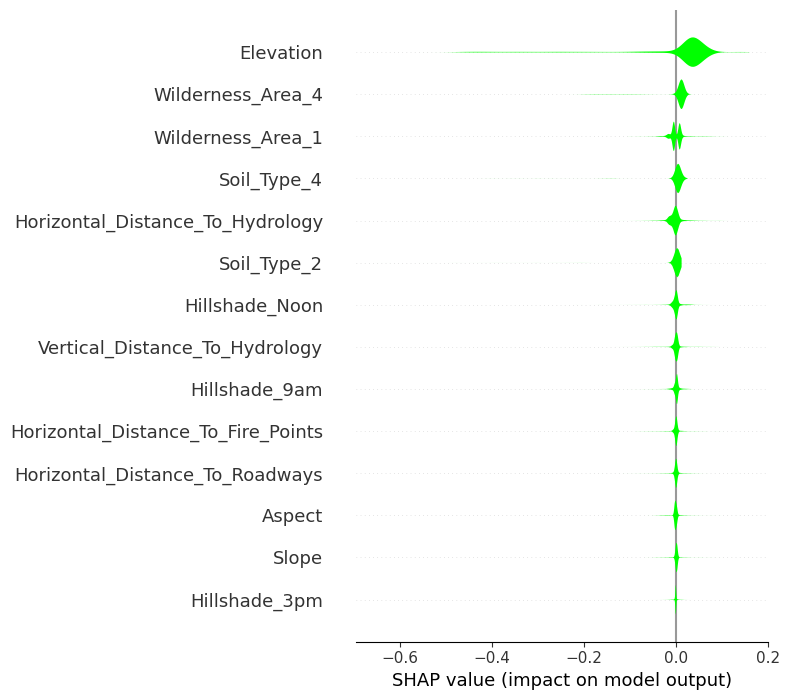

In [27]:
shap.summary_plot(rf_explainer.shap_values(X)[0], feature_names = X.columns.tolist(), plot_type = 'violin', color = 'Lime')

In [28]:
f = lambda x: rf_model.predict_proba(x)[:,1]
median = X_train.median().values.reshape((1,X_train.shape[1]))

explainer = shap.Explainer(f, median)
shap_values = explainer(X_test)#.iloc[0:10,:])

Permutation explainer: 3001it [29:32,  1.69it/s]


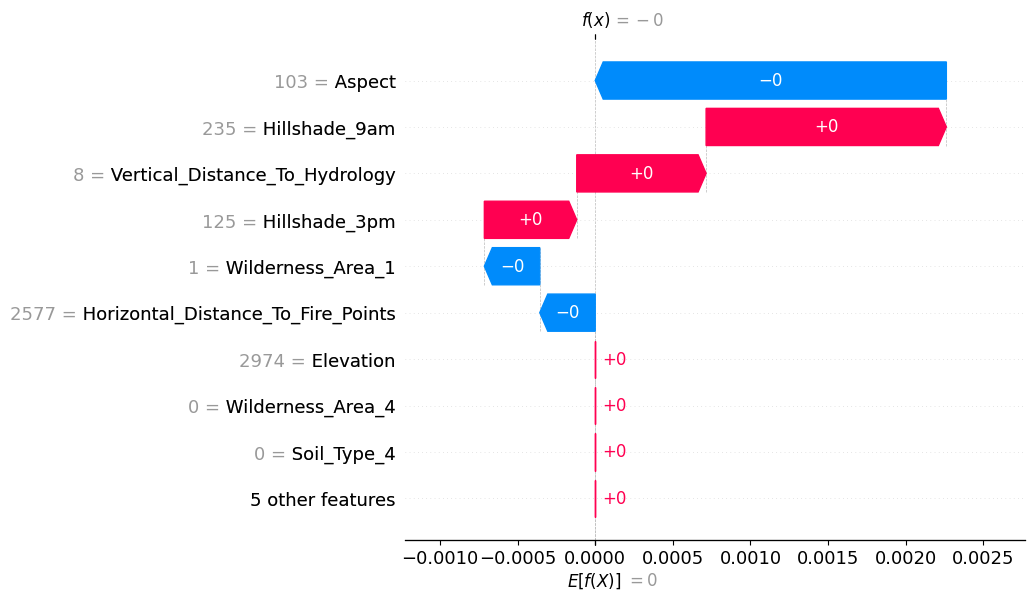

In [54]:
shap.plots.waterfall(shap_values[2])

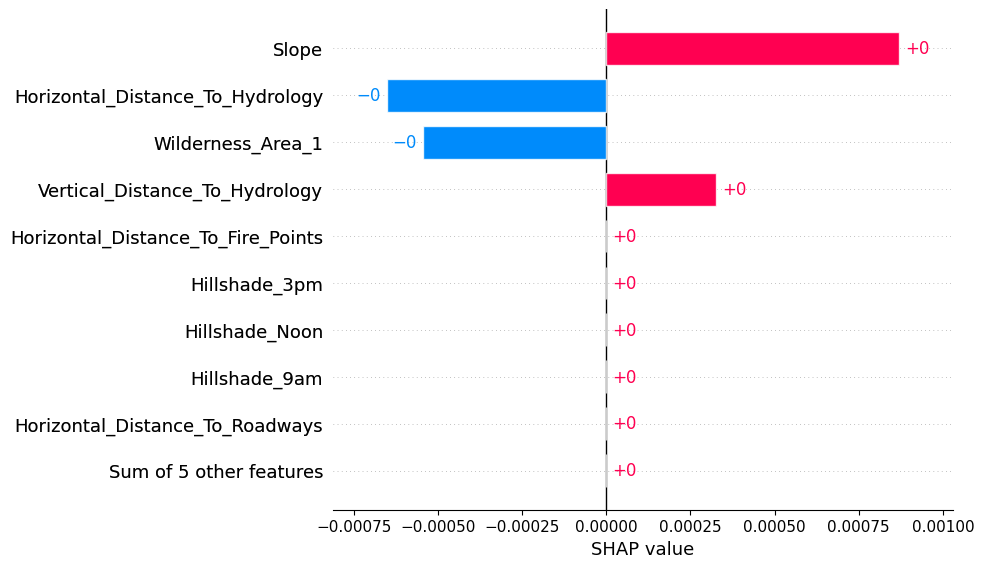

In [30]:
shap.plots.bar(shap_values[0])

In [31]:
shap.plots.initjs()
shap.plots.force(shap_values[1],
                 feature_names = X.columns.tolist())

In [32]:
shap.plots.initjs()
shap.plots.force(shap_values)

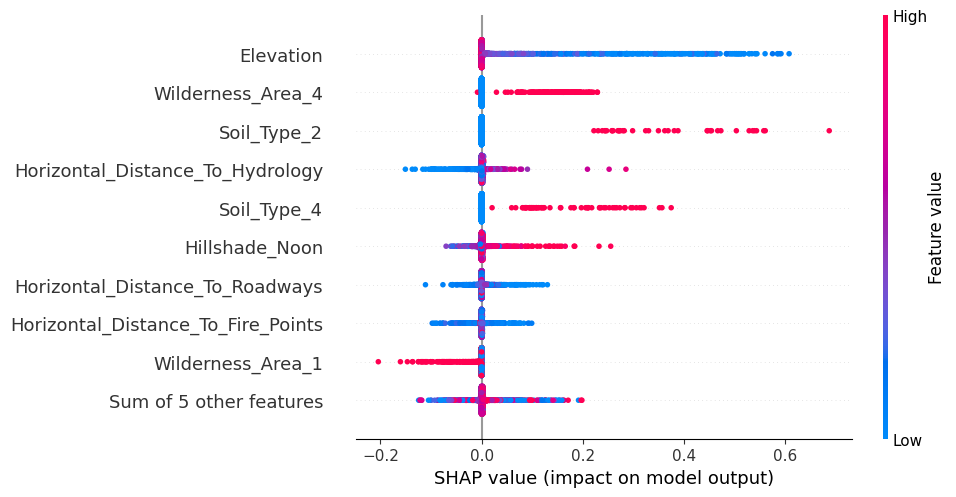

In [33]:
shap.plots.beeswarm(shap_values)

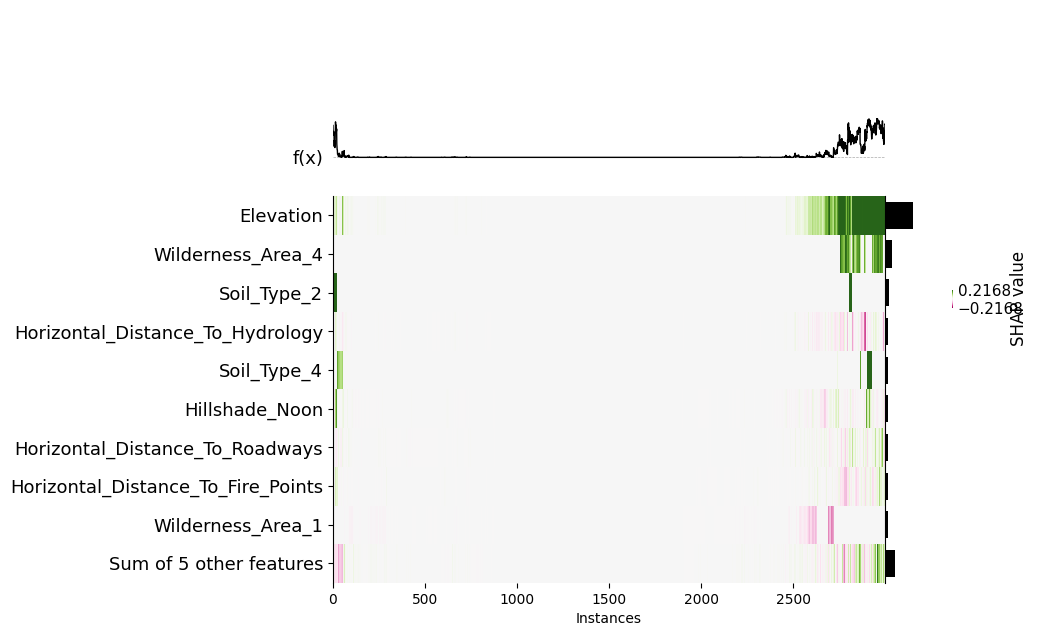

In [34]:
shap.plots.heatmap(shap_values, cmap="PiYG")

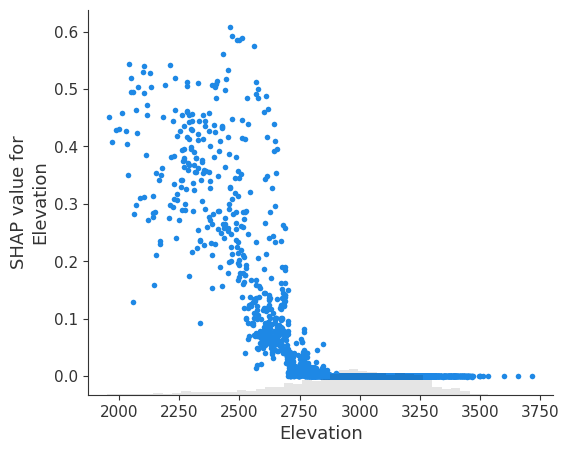

In [35]:
shap.plots.scatter(shap_values[:,"Elevation"])

In [36]:
rf_shap_values

[array([[ 4.71285744e-02,  1.38242620e-02,  4.37788631e-03, ...,
          5.06357263e-04, -2.47133629e-04,  2.79769804e-04],
        [ 2.75881537e-02,  9.86643967e-03,  4.17677979e-03, ...,
         -1.39128600e-03, -5.03874727e-04,  7.00375767e-04],
        [ 2.71986256e-02,  1.30114427e-02,  4.86459144e-03, ...,
          3.17479386e-04, -6.20373954e-04,  4.62115797e-04],
        ...,
        [ 3.61711061e-02,  1.36029890e-02,  3.87244076e-03, ...,
          2.15505368e-03,  1.32273090e-04, -5.28520115e-04],
        [ 2.72376173e-02,  1.15196151e-02,  4.36834101e-03, ...,
          5.60097087e-04,  9.89915226e-05,  2.74200349e-04],
        [ 4.47516376e-02,  1.31901465e-02,  4.75354955e-03, ...,
         -5.69958824e-03, -2.06256250e-04,  1.66299030e-03]]),
 array([[-4.71285744e-02, -1.38242620e-02, -4.37788631e-03, ...,
         -5.06357263e-04,  2.47133629e-04, -2.79769804e-04],
        [-2.75881537e-02, -9.86643967e-03, -4.17677979e-03, ...,
          1.39128600e-03,  5.03874727e

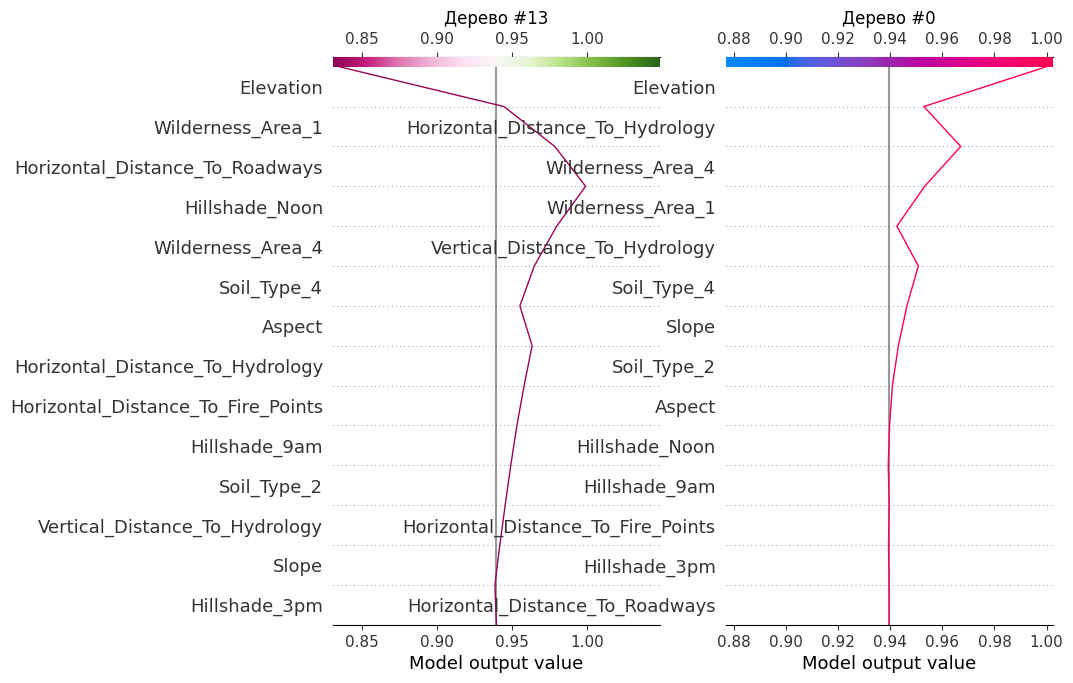

In [109]:
import matplotlib.pyplot as plt

#rfModel_1b_shap_values = rf_explainer.shap_values(X.iloc[11,:])

fig = plt.figure(figsize=(16,1))

ax1 = fig.add_subplot(121)
shap.decision_plot(rf_explainer.expected_value[0],
                   rf_shap_values[0][13], plot_color = 'PiYG',
                   feature_names = X.columns.tolist(), show=False)
ax1.title.set_text('Дерево #13')

ax2 = fig.add_subplot(122)
shap.decision_plot(rf_explainer.expected_value[0],
                   rf_shap_values[0][0],
                   feature_names = X.columns.tolist(), show=False)
ax2.title.set_text('Дерево #0')
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1)
plt.show()

In [38]:
%%bash
pip install dalex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for dalex: filename=dalex-1.6.0-py3-none-any.whl size=1046001 sha256=60c119cae5ebf2297d5165c130fd573349df9432b18302c0884462f6856a836f
  Stored in directory: /root/.cache/pip/wheels/c8/45/19/f5810bf7c5ff9a476ebd89bb5b81a18ffcdf93931d17dbb0c1
Successfully built dalex


In [39]:
import dalex as dx

In [40]:
dataRow_1 = X.iloc[5]
dataRow_2 = X.iloc[150]
newDf_test_1 = pd.DataFrame(columns = X.columns)
newDf_test_1 = newDf_test_1.append(dataRow_1, ignore_index=True)

newDf_test_2 = pd.DataFrame(columns = X.columns)
newDf_test_2 = newDf_test_2.append(dataRow_2, ignore_index=True)

In [41]:
print(y.iloc[5])   # Используйте .iloc вместо обычной индексации для доступа по числовому индексу
print(y.iloc[150])

Others
Others


In [42]:
X = X.reset_index(drop=True)
exp = dx.Explainer(rf_model, X, y)

Preparation of a new explainer is initiated

  -> data              : 10000 rows 14 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 10000 values
  -> target variable   : Please note that 'y' is a string array.
  -> target variable   : 'y' should be a numeric or boolean array.
  -> target variable   : Otherwise an Error may occur in calculating residuals or loss.
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f98530e7e20> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.0591, max = 0.995
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         :  'residual

In [43]:
bd_row_1 = exp.predict_parts(john, type='break_down', label=john.index[0])
bd_interactions_john = exp.predict_parts(john, type='break_down_interactions', label="John+")

sh_mary = exp.predict_parts(mary, type='shap', B = 10, label=mary.index[0])

NameError: ignored

In [ ]:
cp_test_1 = exp.predict_profile(newDf_test_1, label=newDf_test_1.index[0])
cp_test_2 = exp.predict_profile(newDf_test_2, label=newDf_test_2.index[0])

cp_test_1.result.head()

In [ ]:
cp_test_1.plot(cp_test_2)

In [ ]:
cp_test_1.plot(cp_test_2)

In [44]:
%%bash
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=88d19c76191396c44982688f01a409403fc34017db0146ef0725ca9d0e9d3473
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [45]:
X = df_2_classes.drop(['Cover_Type','Cover_Name'],axis=1)
y = df_2_classes['Cover_Type']

In [46]:
y.value_counts()

1    9395
0     605
Name: Cover_Type, dtype: int64

In [47]:
df_2_classes_clean = df_2_classes.drop(['Cover_Name'],axis=1)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=None, max_features= 7, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_features=7, n_estimators=200)

In [50]:
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer


In [110]:
np.random.seed(123)
predict_fn = lambda x: rf_model.predict_proba(x)

explainer = lime.lime_tabular.LimeTabularExplainer((X.astype(float)).values, mode='classification',
                                                   class_names=['Ponderosa_Pine', 'Others'], training_labels=df_2_classes_clean['Cover_Type'], feature_names=X.columns)

i = 4775
exp = explainer.explain_instance(df_2_classes_clean.loc[i, X.columns].astype(float).values,
                                 predict_fn, num_features=7)
exp.show_in_notebook(show_table=True)